In [1]:
import pandas as pd
import numpy as np

In [2]:
univ=pd.read_csv('Universities.csv')
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()
univ_scaled=scaler.fit_transform(univ.iloc[:,1:])
univ_scaled

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [7]:
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


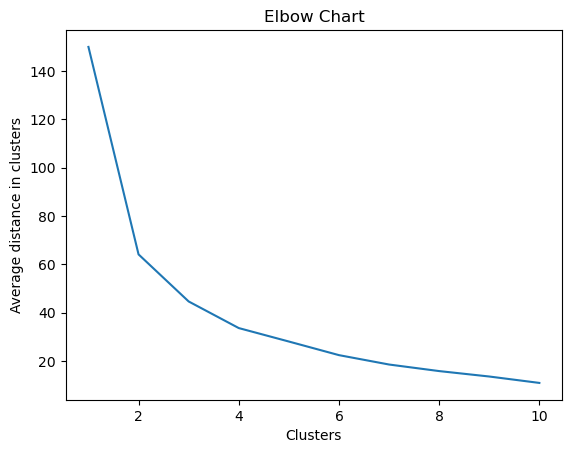

In [12]:
Avg_distance=[]
for i in range(1,11):
        kmeans=KMeans(n_clusters=i,random_state=11)
        kmeans.fit(univ_scaled)
        Avg_distance.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,11),Avg_distance)
plt.title('Elbow Chart')
plt.xlabel('Clusters')
plt.ylabel('Average distance in clusters')
plt.show();

In [16]:
kmeans=KMeans(n_clusters=4,random_state=11)
clusters=kmeans.fit(univ_scaled)
clusters.labels_

array([3, 0, 1, 3, 1, 3, 3, 1, 3, 0, 3, 1, 1, 2, 3, 2, 3, 2, 1, 1, 1, 1,
       1, 2, 3])

In [18]:
univ['clusterid_new'] = clusters.labels_
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [22]:
univ.groupby('clusterid_new').agg(['mean']).reset_index()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14548\2095954576.py:1: FutureWarning: ['Univ'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  univ.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000
1,1,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
2,2,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
3,3,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
